#Introdução
> Walmart, Inc., é uma multinacional estadunidense de lojas de departamento.  
A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972.   
No ano de 2021, obteve um um lucro de $13.51 Bilhões.  
Sendo uma das principais lojas de varejo do mundo, os dados contemplam as vendas semanais de 45 lojas espalhadas pelos Estados Unidos.   
O Walmart realiza vários eventos promocionais de descontos ao longo do ano. 
Essas remarcações precedem feriados importantes, os quatro maiores de todos, que são o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o Natal. 
As semanas que incluem esses feriados têm um peso maior.


# 1.0 A questão do negócio
A empresa Walmart deseja fazer um investimento em uma das lojas localizadas nos Estados Unidos a fim de expandir seu tamanho.  
Foram avaliados os dados de 45 lojas, com as seguintes
informações:  
>● Semana de Venda;  
● Venda Naquela Semana;  
● Flag se é ou não semana com feriado (1 - Holiday Week 0 - Non-HolidayWeek);  
● Temperatura do dia em °F;  
● Preço do combustível na região da loja;  
● Índice de preços ao consumidor e  
● Taxa de desemprego.


#2.0 Entendimento do negócio
Através dos dados disponibilizados, foram analisados gráficos e DataFrames (Tabelas) para ser possível determinar:  
>● As Lojas com maiores médias de Vendas Semanais;  
● Preço médio de venda semanal por loja;  
● A loja com maior venda acumulada (soma de vendas de todo o
período) e em quantas semanas do ano ela ultrapassou a média do
período;  
● Vendas máximas, mínimas e médias de todas as lojas
ao longo do tempo;  
● Comparativo dos preços de combustível na região da loja;  
● Comparativo de taxa de desemprego;  
● Índice de temperatura: para avaliar em quais lojas a temperatura
média tem a possibilidade de nevar;  
● Médias por loja e visualização e ordenação decrescente pelas maiores médias de venda

Com essa análise foi possível visualizar dentre as que mais vendem, o que elas têm em comum e principalmente se, dentre estes que mais vendem, tem algum que se destaca por ter índices diferentes.

# 3.0 Coleta de dados 

## 3.1 Descrição dos dados

###Feriados
> **Super Bowl**: 12-Feb-10, 11-Feb-11, 10-Feb-12    
**Labour Day**: 10-Sep-10, 09-Sep-11, 07-Sep-12  
**Thanksgiving**:26-Nov-10, 25-Nov-11, 23-Nov-1  
**Christmas**:31-Dec-10, 30-Dec-11, 28-Dec-12

###Variáveis
> **Store**: Número da Loja  
**Date**:Semana de Venda  
**Weekly_Sales**:Venda Naquela Semana    
**Holiday_Flag**:Flag se é ou não semana com feriado (1 - Holiday Week 0 - Non-Holiday Week)  
**Temperature**:Temperatura do dia em °F  
**Fuel_Price**:Preço do combustível na região da loja  
**CPI**:Índice de preços ao consumidor  
**Unemployment**:Taxa de desemprego


 













 







## 3.2 Importação das bibliotecas usadas

In [ ]:
import pandas as pd
pd.set_option("display.float_format", lambda x: "%.2f" % x)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime

## 3.3 Tranformando o arquivo CSV em um dataframe para melhor vizualização das colunas

In [ ]:
df = pd.read_csv('sample_data/Walmart.csv', sep=';')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05/02/2010,1643690.90,0,42.31,2.57,2.110.963.582,8.11
1,1,12/02/2010,1641957.44,1,38.51,2.55,2.112.421.698,8.11
2,1,19/02/2010,1611968.17,0,39.93,2.51,2.112.891.429,8.11
3,1,26/02/2010,1409727.59,0,46.63,2.56,2.113.196.429,8.11
4,1,05/03/2010,1554806.68,0,46.50,2.62,2.113.501.429,8.11
...,...,...,...,...,...,...,...,...
6430,45,28/09/2012,713173.95,0,64.88,4.00,1.920.135.577,8.68
6431,45,05/10/2012,733455.07,0,64.89,3.98,1.921.704.115,8.67
6432,45,12/10/2012,734464.36,0,54.47,4.00,1.923.272.654,8.67
6433,45,19/10/2012,718125.53,0,56.47,3.97,1.923.308.542,8.67


In [ ]:
#Conferindo o Tipo de dados e observando a existência de dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   object 
 7   Unemployment  6435 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 402.3+ KB


# Transformando o Date em tipo data

In [ ]:
df['Date'] = pd.to_datetime( df['Date'].dt.strftime('%m/%d/%Y'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   object        
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 402.3+ KB


## 3.4 Verificando qual o preço médio de venda semanal

In [ ]:
media_semanal = df['Weekly_Sales'].mean().round(2)
print("Média de venda semanal: ", media_semanal)


Média de venda semanal:  1046964.88


## 3.5 Verificando a correlação das variáveis

In [ ]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,Unemployment
Store,1.00,-0.34,-0.00,-0.02,0.06,0.22
Weekly_Sales,-0.34,1.00,0.04,-0.06,0.01,-0.11
Holiday_Flag,-0.00,0.04,1.00,-0.16,-0.08,0.01
Temperature,-0.02,-0.06,-0.16,1.00,0.14,0.10
Fuel_Price,0.06,0.01,-0.08,0.14,1.00,-0.03
Unemployment,0.22,-0.11,0.01,0.10,-0.03,1.00


## 3.6 Verificando no gráfico as correlações

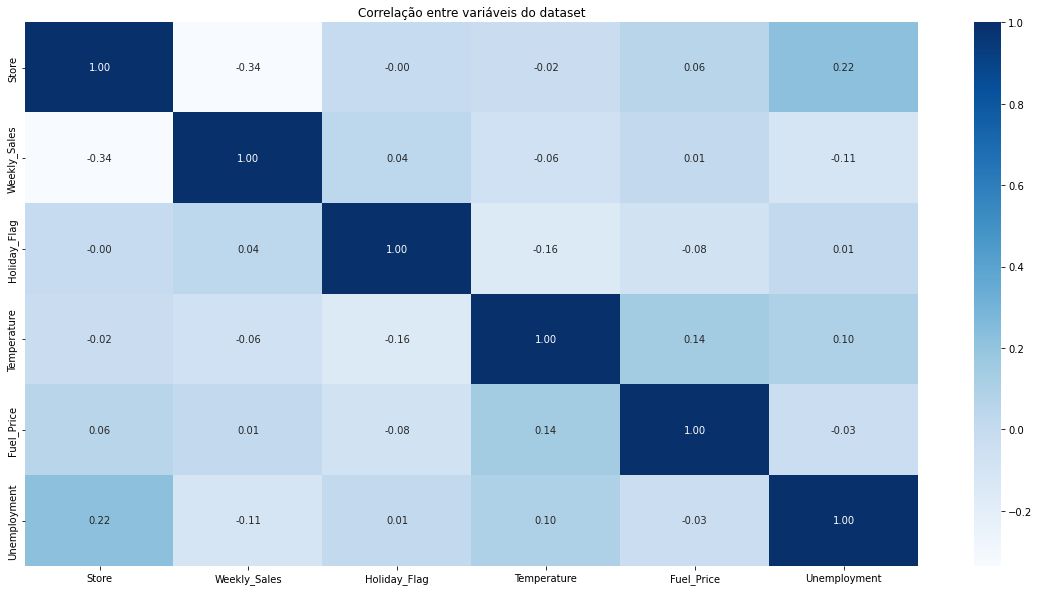

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

# 4.0 Insights



## 4.1 Verificação da média de vendas semanais por cada loja



In [ ]:
media_semanal = df.groupby(['Store'])['Weekly_Sales'].mean().round(2).sort_values(ascending = False)
media_semanal

Store
20   2107676.87
4    2094712.96
14   2020978.40
13   2003620.31
2    1925751.34
10   1899424.57
27   1775216.20
6    1564728.19
1    1555264.40
39   1450668.13
19   1444999.04
31   1395901.44
23   1389864.46
24   1356755.39
11   1356383.12
28   1323522.24
41   1268125.42
32   1166568.15
18   1084718.42
22   1028501.04
12   1009001.61
26   1002911.84
34    966781.56
40    964128.04
35    919724.98
8     908749.52
17    893581.39
45    785981.41
21    756069.08
25    706721.53
43    633324.72
15    623312.47
7     570617.31
42    556403.86
9     543980.55
29    539451.43
16    519247.73
37    518900.28
30    438579.62
3     402704.44
38    385731.65
36    373511.99
5     318011.81
44    302748.87
33    259861.69
Name: Weekly_Sales, dtype: float64

In [ ]:
means  = df[['Store','Weekly_Sales']].groupby('Store').mean()
means.reset_index(inplace = True)
means.rename(columns = {'Weekly_Sales':'Mean_Sales'}, inplace = True )
media_semanal = pd.merge(df, means, how = 'left', on = 'Store')
media_semanal[['Store','Date','Mean_Sales']]


,Store,Date,Mean_Sales
0,1,05/02/2010,1555264.40
1,1,12/02/2010,1555264.40
2,1,19/02/2010,1555264.40
3,1,26/02/2010,1555264.40
4,1,05/03/2010,1555264.40
...,...,...,...
6430,45,28/09/2012,785981.41
6431,45,05/10/2012,785981.41
6432,45,12/10/2012,785981.41
6433,45,19/10/2012,785981.41


In [ ]:
media_semanal[['Store','Date','Mean_Sales']].max(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


0      1555264.40
1      1555264.40
2      1555264.40
3      1555264.40
4      1555264.40
          ...    
6430    785981.41
6431    785981.41
6432    785981.41
6433    785981.41
6434    785981.41
Length: 6435, dtype: float64

## 4.2 Vendas máximas, mínimas e médias de todas as lojas ao longo do tempo.

In [ ]:
vendas = df.groupby('Store').agg({'Weekly_Sales':['max', 'min', 'mean']})
vendas.head(20)

Weekly_Sales                      
               max        min       mean
Store                                   
1       2387950.20 1316899.31 1555264.40
2       3436007.68 1650394.44 1925751.34
3        605990.41  339597.38  402704.44
4       3676388.98 1762539.30 2094712.96
5        507900.07  260636.71  318011.81
6       2727575.18 1261253.18 1564728.19
7       1059715.27  372673.61  570617.31
8       1511641.09  772539.12  908749.52
9        905324.68  452905.22  543980.55
10      3749057.69 1627707.31 1899424.57
11      2306265.36 1100418.69 1356383.12
12      1768249.89  802105.50 1009001.61
13      3595903.20 1633663.12 2003620.31
14      3818686.45 1479514.66 2020978.40
15      1368318.17  454183.42  623312.47
16      1004730.69  368600.00  519247.73
17      1309226.79  635862.55  893581.39
18      2027507.15  540922.94 1084718.42
19      2678206.42 1181204.53 1444999.04
20      3766687.43 1761016.51 2107676.87

##4.3 Gráfico vendas máximas, mínimas e médias

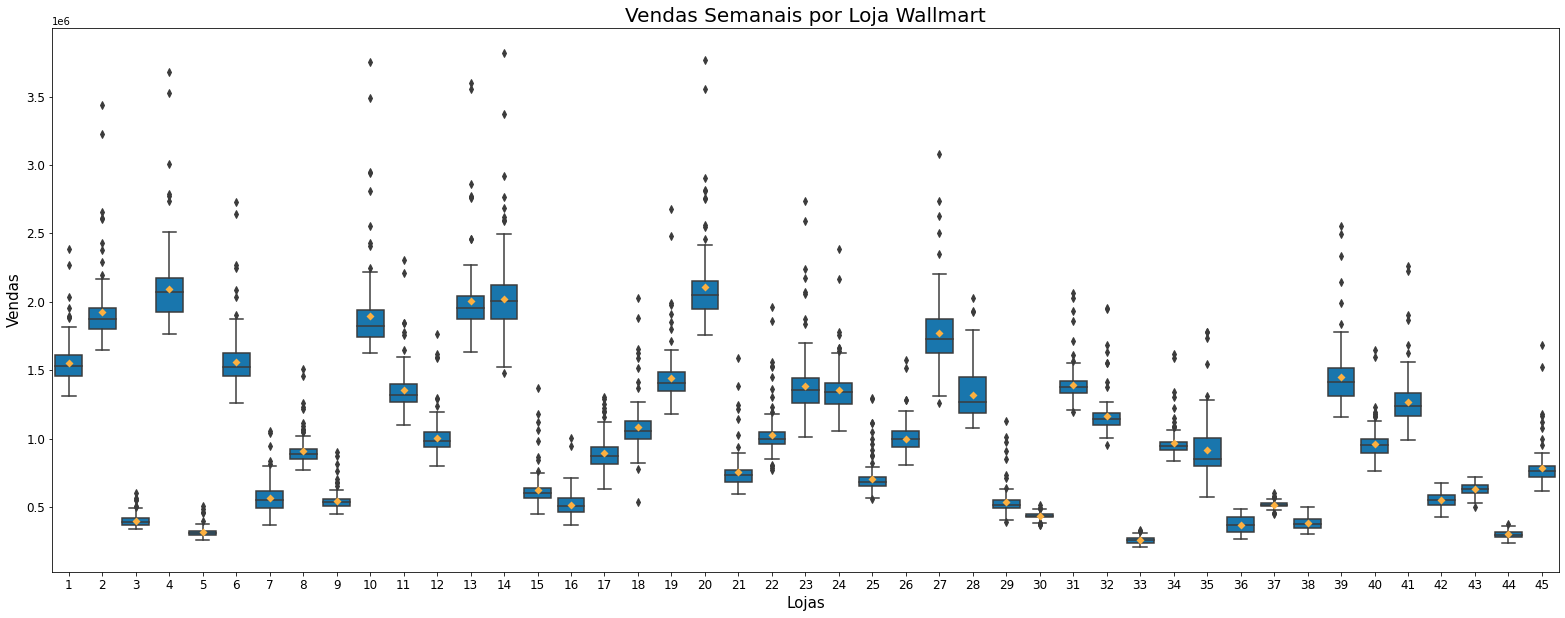

In [ ]:
plt.figure(figsize=(27, 10))
sns.boxplot(x="Store", 
            y="Weekly_Sales", 
            data=df,
            color="#007DC6", 
            showmeans=True, 
            meanprops={"marker": "D", 
                       "markeredgecolor": "none",
                       "markerfacecolor":"#FCB040", 
                       "markersize": "6"} )
plt.title("Vendas Semanais por Loja Wallmart",fontsize=20)
plt.ylabel("Vendas", fontsize= 15)
plt.xlabel("Lojas",fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

## 4.4 Comparativo do preço do combustível por região

### 4.4.1 preço médio do combustivel:

In [ ]:
df['Fuel_Price'].mean()

3.358606837606838

### 4.4.2 Menores preços do combustível por loja

In [ ]:
# Lojas com menores preços de combustível
fuel_price = df.groupby(['Store'])['Fuel_Price'].mean().sort_values()
fuel_price.head()

Store
36   3.20
34   3.22
4    3.22
1    3.22
21   3.22
Name: Fuel_Price, dtype: float64

### 4.4.3 Representação gráfica desse quantitativo

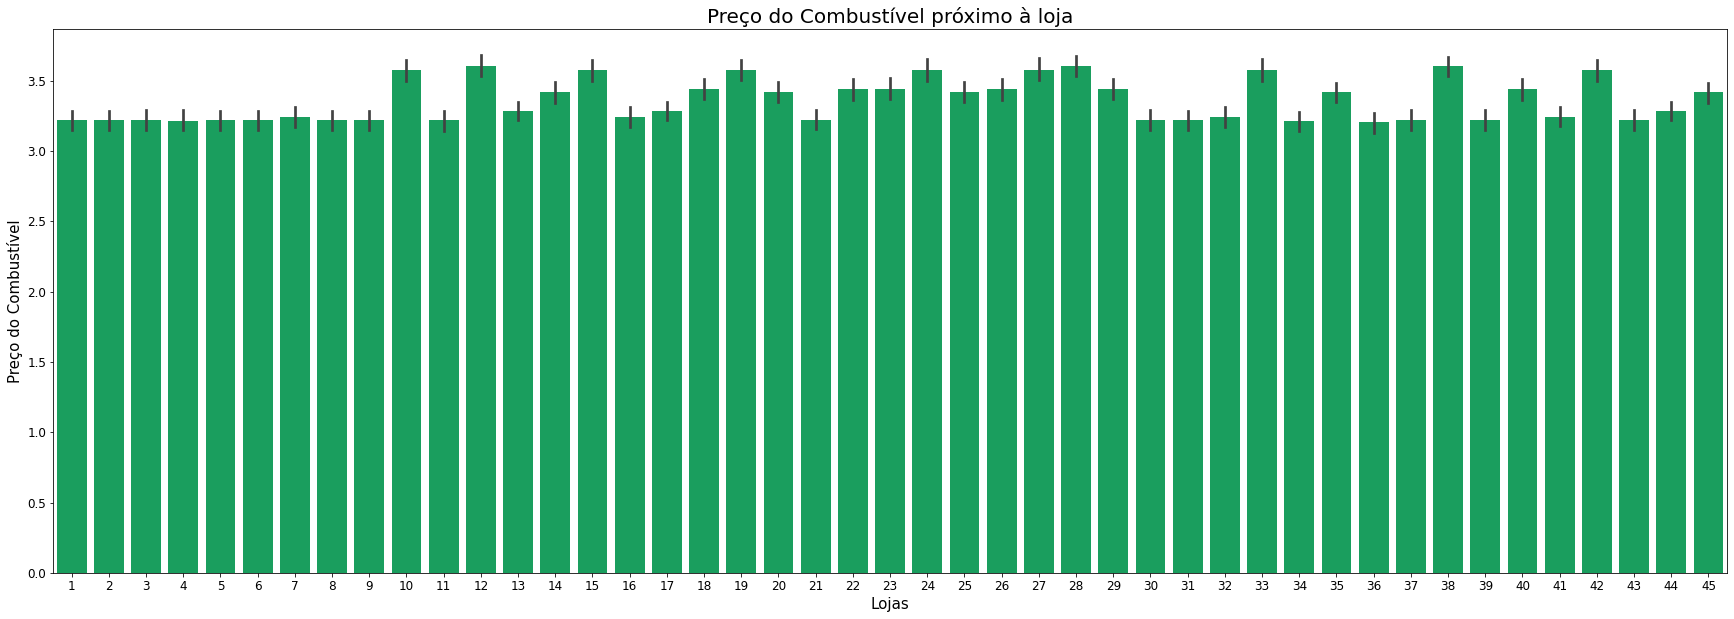

In [ ]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Store", 
            y="Fuel_Price", 
            data=df,
            color="#04B45F",
             )
plt.title("Preço do Combustível próximo à loja",fontsize=20)
plt.ylabel("Preço do Combustível", fontsize= 15)
plt.xlabel("Lojas",fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

## 4.5 Comparativo de taxa de desemprego (se essa taxa for elevada então estimasse o baixo consumo na região).

### 4.5.1 Dez primeiras Lojas com menores taxas de desemprego

In [ ]:

desemprego = df.groupby('Store')['Unemployment'].mean().sort_values()
desemprego.head(10)

Store
23   4.80
40   4.80
4    5.96
8    6.09
9    6.10
5    6.30
16   6.48
17   6.55
6    6.61
44   6.74
Name: Unemployment, dtype: float64

### 4.5.2 Gráfico com a Taxa de desemprego por região de cada Loja

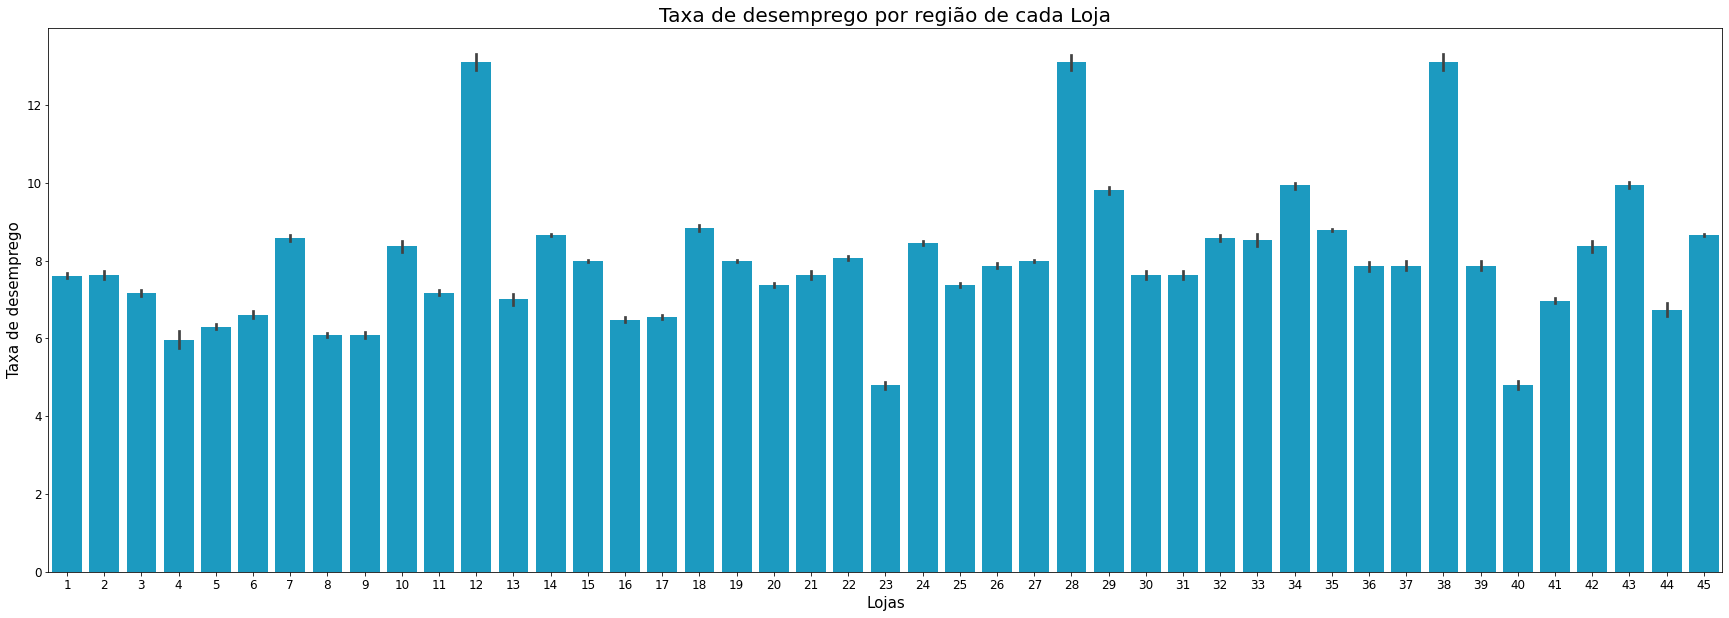

In [ ]:

plt.figure(figsize=(30, 10))
sns.barplot(x="Store", 
            y="Unemployment", 
            data=df,
            color="#01A9DB")
plt.title("Taxa de desemprego por região de cada Loja",fontsize=20)
plt.ylabel("Taxa de desemprego", fontsize= 15)
plt.xlabel("Lojas",fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

##4.6 Temperatura por região de cada loja, pois se ela for baixa há tendência de neve que impacta diretamente nos fluxos de vendas.

In [ ]:
df_temp = df[['Temperature', 'Store']]
df_grp = df_temp.groupby(['Temperature', 'Store'], as_index=False).count()
df_grp

,Temperature,Store
0,-2.06,7
1,5.54,26
2,6.23,17
3,7.46,7
4,9.51,40
...,...,...
6325,99.22,28
6326,99.22,38
6327,99.66,33
6328,100.07,33
